In [1]:
import matplotlib.pyplot as plt
import networkx as nx

from extensive_testing.experimental_environment.noice_experiment.stochatic_block_model import StochasticBlock
import numpy as np
import torch
from torch import ones
from fugw.solvers import FUGWSolver, FUGWSparseSolver
import utils

[[0, 1], [0, 2], [0, 3], [0, 4], [0, 8], [1, 0], [1, 2], [1, 3], [2, 0], [2, 1], [2, 7], [3, 0], [3, 1], [3, 8], [4, 0], [4, 5], [5, 4], [5, 7], [6, 7], [6, 8], [7, 2], [7, 5], [7, 6], [7, 8], [8, 0], [8, 3], [8, 6], [8, 7]]
[[0, 1], [0, 2], [0, 3], [0, 4], [0, 8], [1, 0], [1, 2], [1, 3], [2, 0], [2, 1], [2, 7], [3, 0], [3, 1], [3, 8], [4, 0], [4, 5], [5, 4], [5, 7], [6, 7], [6, 8], [7, 2], [7, 5], [7, 6], [7, 8], [8, 0], [8, 3], [8, 6], [8, 7]]
<class 'list'>


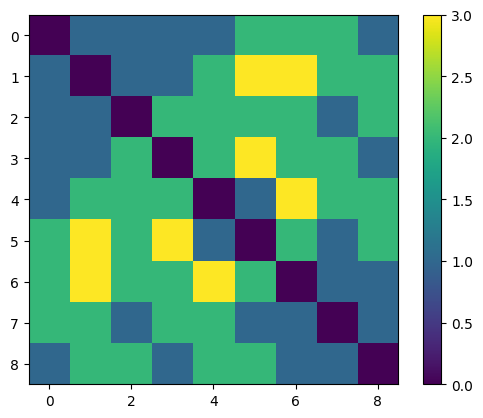

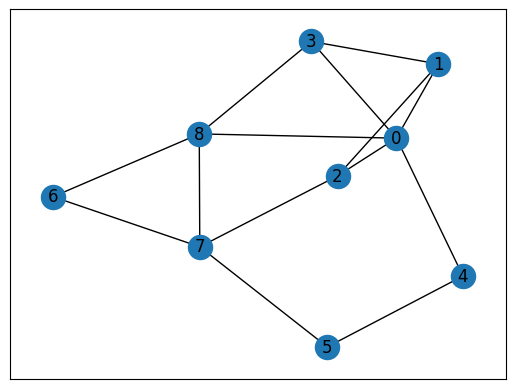

In [2]:
stochastic_block = StochasticBlock(number_of_blocks=3 ,number_of_nodes=3 ,p=[0.8])
stochastic_block.generate_model()
Converter = utils.AdjGeodConverter(stochastic_block.model[0])
D_s, adj_D_s, weights = Converter.generate_geodesic()


plt.imshow(D_s)
plt.colorbar()
plt.show()
G = nx.Graph(adj_D_s)
#for i,j in zip(adj_D,weights):
#    G.add_edge(i[0],i[1],weight = j)


nx.draw_networkx(G)
plt.draw()

[[0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [1, 5], [2, 0], [2, 3], [2, 5], [2, 6], [2, 7], [2, 8], [3, 0], [3, 2], [3, 4], [3, 6], [4, 0], [4, 3], [4, 5], [4, 6], [4, 7], [4, 8], [5, 0], [5, 1], [5, 2], [5, 4], [5, 6], [5, 7], [6, 0], [6, 2], [6, 3], [6, 4], [6, 5], [6, 7], [6, 8], [7, 0], [7, 2], [7, 4], [7, 5], [7, 6], [8, 2], [8, 4], [8, 6]]
[[0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [1, 5], [2, 0], [2, 3], [2, 5], [2, 6], [2, 7], [2, 8], [3, 0], [3, 2], [3, 4], [3, 6], [4, 0], [4, 3], [4, 5], [4, 6], [4, 7], [4, 8], [5, 0], [5, 1], [5, 2], [5, 4], [5, 6], [5, 7], [6, 0], [6, 2], [6, 3], [6, 4], [6, 5], [6, 7], [6, 8], [7, 0], [7, 2], [7, 4], [7, 5], [7, 6], [8, 2], [8, 4], [8, 6]]


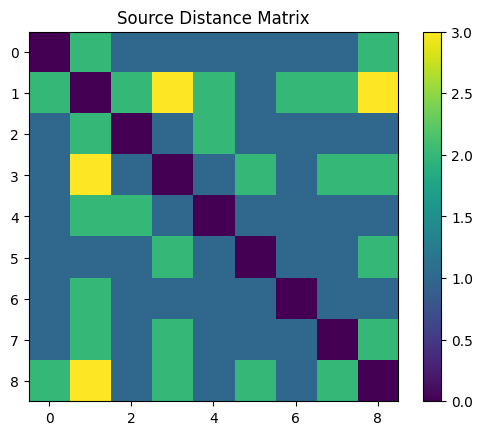

44
[[0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0], [2.0, 0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 3.0], [1.0, 2.0, 0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0], [1.0, 3.0, 1.0, 0, 1.0, 2.0, 1.0, 2.0, 2.0], [1.0, 2.0, 2.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 2.0, 1.0, 0, 1.0, 1.0, 2.0], [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0], [1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0, 2.0], [2.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 0]]
[[0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [1, 5], [2, 0], [2, 3], [2, 5], [2, 6], [2, 7], [2, 8], [3, 0], [3, 2], [3, 4], [3, 6], [4, 0], [4, 3], [4, 5], [4, 6], [4, 7], [4, 8], [5, 0], [5, 1], [5, 2], [5, 4], [5, 6], [5, 7], [6, 0], [6, 2], [6, 3], [6, 4], [6, 5], [6, 7], [6, 8], [7, 0], [7, 2], [7, 4], [7, 5], [7, 6], [8, 2], [8, 4], [8, 6]]


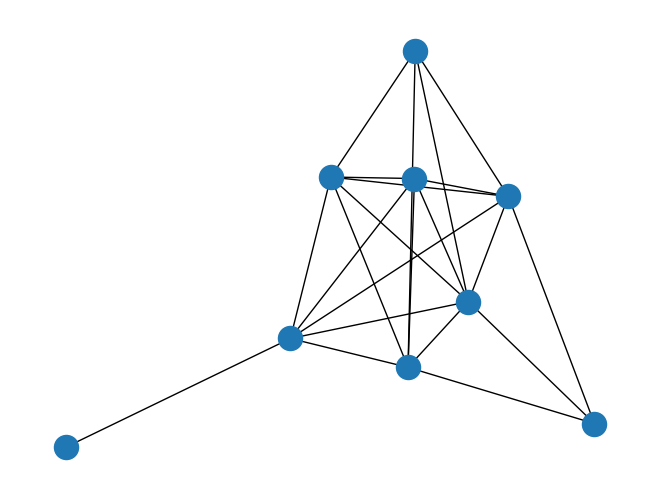

In [3]:
stochastic_block = StochasticBlock(number_of_blocks=3 ,number_of_nodes=3 ,p=[0.5])
stochastic_block.generate_model()
Converter = utils.AdjGeodConverter(stochastic_block.model[0])
D_t, adj_D_t, _ = Converter.generate_geodesic()

plt.title("Source Distance Matrix")
plt.imshow(D_t)
plt.colorbar()
plt.show()

G = nx.Graph(adj_D_t)
#for i,j in zip(adj_D,weights):
#    G.add_edge(i[0],i[1],weight = j)


nx.draw_spring(G)
plt.draw()


In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

init_plan = (
    (ones(9, 9) / 9).to_sparse_coo().to(device).to_sparse_csr()
)

C:\Users\Acer\AppData\Local\Temp\ipykernel_29420\4245102485.py:6: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\SparseCsrTensorImpl.cpp:56.)
  (ones(9, 9) / 9).to_sparse_coo().to(device).to_sparse_csr()


In [5]:
fugw = FUGWSolver(
        nits_bcd=100,
        nits_uot=1000,
        tol_bcd=1e-7,
        tol_uot=1e-7,
        early_stopping_threshold=1e-5,
        eval_bcd=2,
        eval_uot=10,
        # Set a high value of ibpp, otherwise nans appear in coupling.
        # This will generally increase the computed fugw loss.
        ibpp_eps_base=1e3,
    )


Ds = torch.Tensor(np.multiply(D_s,D_s)).to(device).to()
Dt = torch.Tensor(np.multiply(D_t,D_t)).to(device)

F = torch.cdist(torch.Tensor(np.ones((9,1))), torch.Tensor(np.zeros((9,1))))

In [ ]:
res = fugw.solve(
        alpha=0.7,
        rho_s=2,
        rho_t=3,
        eps=0.02,
        reg_mode="independent",
        F=F,
        Ds=Ds,
        Dt=Dt,
        init_plan=None,
        solver="mm",
        verbose=True,
    )

Output()

In [ ]:
pi = res["pi"]
print(pi)
gamma = res["gamma"]
print(gamma)
duals_pi = res["duals_pi"]
print(duals_pi)
duals_gamma = res["duals_gamma"]
print(duals_gamma)
loss_steps = res["loss_steps"]
print(loss_steps)
loss = res["loss"]
print(loss)
loss_entropic = res["loss_entropic"]
print(loss_entropic)
loss_times = res["loss_times"]
print(loss_times)